#introduction

##the task at hand

For this submission I will be following and citing frequently *Deep Learning With Python* (F. Chollet, Deep Learning with Python. Shelter Island (New York, Estados Unidos): Manning, Cop, 2018.)

Using the *Boston Housing Pricing* dataset shipped with Keras. I will create a regression model that allows the user to make predictions on housing prices given a list of features.

## taking a closer look at our dataset

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())
train_data

57026/57026 [==============================] - 0s 0us/step


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

Obviously this is not of much use to us however the *Keras documentation* will tell us: each sample (a property counted in the dataset) contains 13 features describing the area the house is in, they are as follows:

* Per capita crime rate by town
* Proportion of residential land zoned for lots over 25,000 sq.ft.
* Proportion of non-retail business acres per town
* Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* Nitric oxides concentration (parts per 10 million)
* Average number of rooms per dwelling
* Weighted distances to five Boston employment centres
* Index of accessibility to radial highways
* Full-value property-tax rate per $10,000
* 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (obviously this is appauling that it was even included in the dataset - it was however compiled in 1978, and for the sake of learning machine learning is unfortunately a valuable resource, so we will still continue to use this dataset for the sake of understanding how to create a regression model.)
* % lower status of the population
* Median value of owner-occupied homes in 1000's (dollars)


The *Keras documentation* will also tell us that the 'targets' of the dataset, detail the values of the homes per sample in 1000's dollars.

Citation:
K. Team, “Keras documentation: Boston Housing price regression dataset,” keras.io. https://keras.io/api/datasets/boston_housing/ (accessed Nov. 15, 2022).





Typically in machine learning we will want to check our dataset for anomalies, 'noisy' data, non representative data (this would be in the case we were perhaps given a brief of creating a ML model that predicts San Fransisco housing market trends in 2021). However as this is a dataset shipped with Keras, for the sake of this exercise we can trust it.

##understanding the data

It is very valuable to get a rough understanding of our dataset before we start working alongside it. To do this I'd like to plot graphs of the different features of our dataset to get a better idea of the ranges we are working with.

###understanding trends

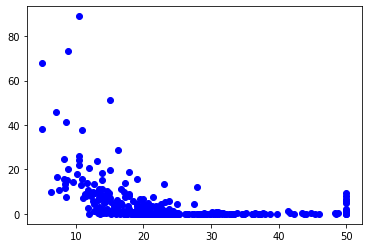

In [ ]:
import matplotlib.pyplot as plt
crime = []
for sample in train_data:
  crime.append(sample[0])

plt.plot(train_targets, crime, 'bo', label='crime')


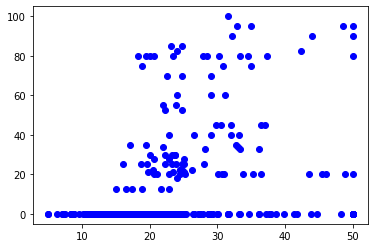

In [ ]:
#plotting the second variable; "Proportion of residential land zoned for lots over 25,000 sq.ft."
resland = []
for sample in train_data:
  resland.append(sample[1])

plt.plot(train_targets, resland, 'bo', label='resland')

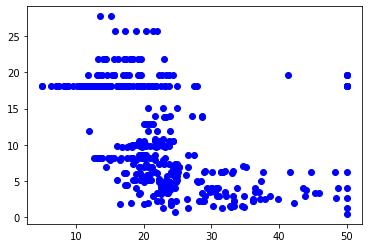

In [ ]:
#plotting the third variable; "Proportion of non-retail business acres per town"
nonretail = []
for sample in train_data:
  nonretail.append(sample[2])

plt.plot(train_targets, nonretail, 'bo', label='nonretail')

###is data missing?

In [ ]:
import pandas as pd
df = pd.DataFrame(train_data)
df.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
dtype: bool

In [ ]:
df = pd.DataFrame(train_targets)
df.isnull().any()

0    False
dtype: bool

#methodology

Off of what I have learnt in my time studying with *Deep Learning in Python*. My first guess to solve this problem would be to compile a: Sequential model, full of dense layers of 13 units (with the final layer having one unit for predicting the house price). We will use ReLU activation functions to try and eliminate < 0 (incorrect) predictions, we will use a MSE loss function as these are most common in regression problems, and we will make use of an 'rmsprop' optimiser as this is what is most often reccomended in *Deep Learning with Python*

##pre processing our data

It is very important to normalise our data, as deep learning models tend not to perform well on datasets where the features are of larger ranges, so it is important to rescale these.

In [ ]:
mean = train_data.mean(axis = 0)
train_data -= mean # shift
std = train_data.std(axis = 0)
train_data /= std # rescale

test_data -= mean
test_data /= std

Code: "lab-5-BOSTON.ipynb" - Jérémie Wenger IS53024B/IS53024S/IS71039A: Artificial Intelligence (2022-23)



##building our model

###first attempt

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(13, input_dim = 13, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

# train
history=model.fit(
    train_data,
    train_targets,
    epochs=150,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/150
11/11 [==============================] - 1s 24ms/step - loss: 538.8337 - mae: 21.3638 - val_loss: 609.7438 - val_mae: 22.9206
Epoch 2/150
11/11 [==============================] - 0s 7ms/step - loss: 529.5629 - mae: 21.1754 - val_loss: 601.6490 - val_mae: 22.7593
Epoch 3/150
11/11 [==============================] - 0s 8ms/step - loss: 521.9777 - mae: 21.0180 - val_loss: 593.6563 - val_mae: 22.5975
Epoch 4/150
11/11 [==============================] - 0s 7ms/step - loss: 514.0903 - mae: 20.8555 - val_loss: 585.6711 - val_mae: 22.4335
Epoch 5/150
11/11 [==============================] - 0s 5ms/step - loss: 506.1411 - mae: 20.6903 - val_loss: 578.4927 - val_mae: 22.2800
Epoch 6/150
11/11 [==============================] - 0s 7ms/step - loss: 498.6139 - mae: 20.5268 - val_loss: 570.0271 - val_mae: 22.1010
Epoch 7/150
11/11 [==============================] - 0s 7ms/step - loss: 490.0331 - mae: 20.3428 - val_loss: 560.8096 - val_mae: 21.9052
Epoch 8/150
11/11 [=====================

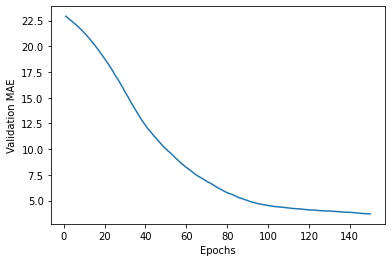

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(1, len(history.history['val_mae']) + 1), history.history['val_mae'])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

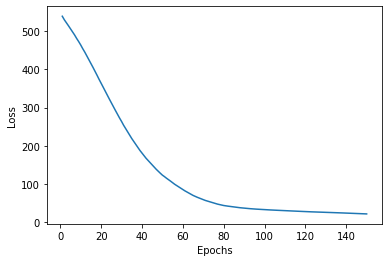

In [ ]:
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Great! We can see here our model is sucessfully fitting however it appears that either our model could be made stronger or, we should allow it to train for more epochs, I will do both here.

###second attempt

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(52, input_dim = 13, activation='relu'))
model.add(layers.Dense(52, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

# train
history=model.fit(
    train_data,
    train_targets,
    epochs=200,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/200
11/11 [==============================] - 1s 17ms/step - loss: 514.3693 - mae: 20.7135 - val_loss: 545.1305 - val_mae: 21.4521
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 454.5011 - mae: 19.2422 - val_loss: 481.3677 - val_mae: 19.9197
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 392.6167 - mae: 17.5967 - val_loss: 412.8172 - val_mae: 18.1688
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: 327.4386 - mae: 15.7402 - val_loss: 333.3587 - val_mae: 15.9785
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 256.1007 - mae: 13.6196 - val_loss: 262.9146 - val_mae: 13.7200
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 193.0388 - mae: 11.3743 - val_loss: 192.8576 - val_mae: 11.1065
Epoch 7/200
11/11 [==============================] - 0s 6ms/step - loss: 138.6317 - mae: 9.1805 - val_loss: 142.3325 - val_mae: 9.0830
Epoch 8/200
11/11 [=======================

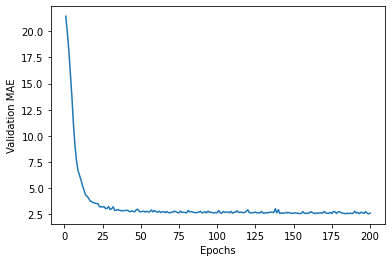

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(1, len(history.history['val_mae']) + 1), history.history['val_mae'])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

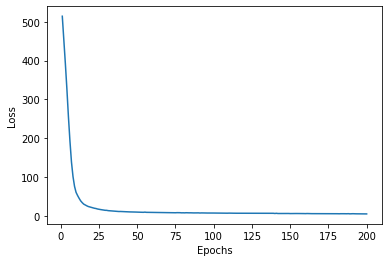

In [ ]:
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Still we aren't achieving validation MAE's of below 1 (which would represent being under a $1000 off the correct price). It should be said this is a very small dataset, and we may want to reconsider our validation technique, we are currently employing a standard 'holdout validation' which is fine for a larger dataset, however 'k fold cross validation' would be much more viable here. On top of this it doesn't seem like down the line our current model architecture will allow for overfitting so we will also increase the power of our model.

###third attempt

At this point I also realised I have been working under the false impression that layer unit numbers cannot be an arbitrary value, and have been trying to correspond them with dataset features. I won't have to concern myself with this now! It should also be said I was working under a common sense baseline of trying to achieve an MAE below 1 (1000 dollars off), however no matter how much I play with the structure of my network I seem to be only reaching a minimun of 2.5 so perhaps this ($1000) measure was innacurate.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, input_dim = 13, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1, activation='linear'))

  model.compile(
      optimizer='rmsprop',
      loss='mse',
      metrics=['mae']
  )
  return model

# train
K = 4
num_val_samples = len(train_data) // K
num_epochs = 60
all_mae_histories = []
all_loss_histories = []

for i in range(K):
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)

    # Build the Keras model (already compiled)
    model = build_model()

    # Train the model (in silent mode, verbose=0)
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=32)

    mae_history = history.history['val_mae']
    loss_history = history.history['loss']

    all_loss_histories.append(loss_history)
    all_mae_histories.append(mae_history)


Epoch 1/60
10/10 [==============================] - 1s 25ms/step - loss: 512.8964 - mae: 20.9104 - val_loss: 355.0843 - val_mae: 16.8199
Epoch 2/60
10/10 [==============================] - 0s 5ms/step - loss: 242.9057 - mae: 13.3193 - val_loss: 73.8538 - val_mae: 6.4779
Epoch 3/60
10/10 [==============================] - 0s 5ms/step - loss: 76.9736 - mae: 6.7175 - val_loss: 46.9965 - val_mae: 4.9534
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 49.9010 - mae: 5.4698 - val_loss: 31.8195 - val_mae: 4.1078
Epoch 5/60
10/10 [==============================] - 0s 5ms/step - loss: 34.8197 - mae: 4.4615 - val_loss: 25.2303 - val_mae: 3.6049
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 26.5962 - mae: 3.7802 - val_loss: 21.7519 - val_mae: 3.3828
Epoch 7/60
10/10 [==============================] - 0s 6ms/step - loss: 21.1850 - mae: 3.2978 - val_loss: 18.5971 - val_mae: 2.8726
Epoch 8/60
10/10 [==============================] - 0s 5ms/step - los

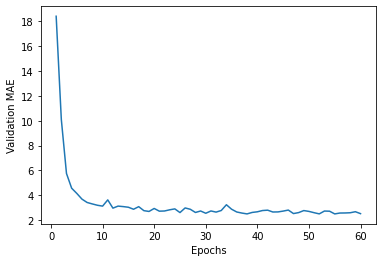

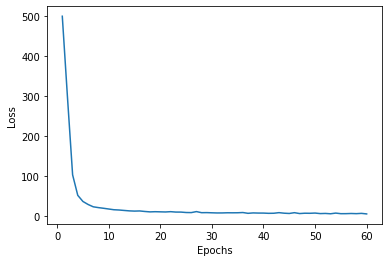

In [ ]:
average_mae_history = np.array(all_mae_histories).mean(axis=0)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

average_loss_history = np.array(all_loss_histories).mean(axis=0)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

At this point we have created a well achieving model it is time develop a model that overfits. (I have already done this, and am happy with my current setup). After creating a model that overfits, and choosing the network setup just prior to that moment, we want to regularise (maximise generalisation performance) our model; to do so we can: remove or add layers, add dropout, add kernel regularisation, try a different learning rate.

###evaluating our model

In [ ]:
result = model.evaluate(test_data, test_targets)
for i in range(len(result)):
    print(f'{model.metrics_names[i]} — -> {result[i]}')


4/4 [==============================] - 0s 4ms/step - loss: 22.9161 - mae: 3.1586
loss — -> 22.91606903076172
mae — -> 3.1585915088653564


THIS IS NOT GOOD! We are 3000 dollars off correct predictions, we should tune this in regularising, I don't think the issue is clear to us yet, so we wont seek to improve the model 'pre-regularisation'

##regularising our model

In [ ]:
from tensorflow.keras import models
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(128, input_dim = 13, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
  model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
  model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
  model.add(layers.Dense(1, activation='linear'))

  #change learning rate here
  rms = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.2)
  model.compile(
      optimizer=rms,
      loss='mse',
      metrics=['mae']
  )
  return model

# train
K = 4
num_val_samples = len(train_data) // K
num_epochs = 50
all_mae_histories = []
all_loss_histories = []

for i in range(K):
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = train_data[a : b]
    val_targets = train_targets[a : b]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)

    # Build the Keras model (already compiled)
    model = build_model()

    # Train the model (in silent mode, verbose=0)
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=16)

    mae_history = history.history['val_mae']
    loss_history = history.history['loss']

    all_loss_histories.append(loss_history)
    all_mae_histories.append(mae_history)


Epoch 1/50
19/19 [==============================] - 1s 13ms/step - loss: 233.5887 - mae: 12.2112 - val_loss: 39.7987 - val_mae: 4.0291
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 35.1123 - mae: 4.0926 - val_loss: 31.1303 - val_mae: 3.6560
Epoch 3/50
19/19 [==============================] - 0s 5ms/step - loss: 26.3209 - mae: 3.2924 - val_loss: 22.5609 - val_mae: 2.6971
Epoch 4/50
19/19 [==============================] - 0s 5ms/step - loss: 22.0951 - mae: 2.8477 - val_loss: 17.6365 - val_mae: 2.4108
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 20.6961 - mae: 2.8827 - val_loss: 15.3537 - val_mae: 2.2757
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 18.5679 - mae: 2.6740 - val_loss: 14.9952 - val_mae: 2.2114
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 18.0749 - mae: 2.6818 - val_loss: 13.3825 - val_mae: 2.0439
Epoch 8/50
19/19 [==============================] - 0s 4ms/step - loss: 1

findings:
* l2 regularizers grant a better mae of around 0.01 (100$)
* changing the learning rate from the defeault 0.001 doesn't provide good results
* increasing momentum yields good results
* less but more powerful layers give us good results
* adding layer dropout is not giving us good results

#results

###evaluating and analysing our model

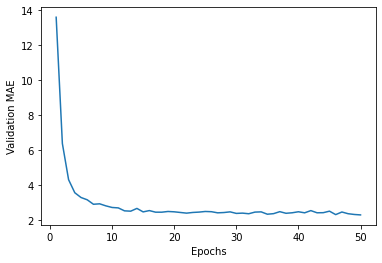

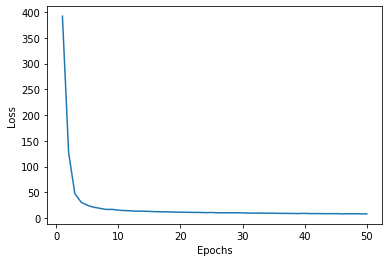

In [ ]:
average_mae_history = np.array(all_mae_histories).mean(axis=0)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

average_loss_history = np.array(all_loss_histories).mean(axis=0)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
result = model.evaluate(test_data, test_targets)
for i in range(len(result)):
    print(f'{model.metrics_names[i]} — -> {result[i]}')


4/4 [==============================] - 0s 6ms/step - loss: 21.7145 - mae: 2.7223
loss — -> 21.71453285217285
mae — -> 2.7222747802734375


After undergoing many experiments to understand the 'perfect' model for our job. We have now achieved a model that will predict house prices with $2500 - 3000 accuracy. We found a smaller model architecture with more units was ideal. Editing the parameters of the optimizer was very useful too, unfortunately something *Chollet* hasn't gone into much yet in my reading, however was able to save me around 0.5MAE (500 dollars). One very important step in the *Universal workflow - Deep Learning with Python 6.1-2* is to overfit your model to find the optimal parameters for your model, however no matter how over the top I made my model, I never seemed to be able to achieve this, even with holdout validation - I believe this this to be an issue with the size of our dataset, something that on my end I would not be able to solve.

CholletF., Deep learning with Python. Shelter Island, NY: Manning Publications, 2018.

#conclusion

Overall, some very valuable research and experimentation with deep learning as a concept has been performed here. Through adjusting parameters and model architecture we have demonstrated what the optimal setup for a regression task like this would look like. As mentioned above, it is unfortunate we couldn't achieve a model with better generalisation power, however like also mentioned above; this appears to be an issue with the dataset, not our code, as we were not able to make the model overfit - no matter how ridiculous we set up our model.

If this task were a brief given by a client - my first step would be to compile more data, there are multitude of resources I could use here: kaggle, my own data research, etc. As ideally we would have a dataset large enough that standard holdout validation would be suitable. Onwards of that I would follow the same procedures as laid out by the *Universal Workflow - Deep Learning with Python* like I have done in my code here, and I would imagine at that point I would produce a model with very good generalisation power.



In [ ]:
%%shell
jupyter nbconvert --to html /content/Artificial_intelligence_Coursework_1.ipynb

[NbConvertApp] Converting notebook /content/Artificial_intelligence_Coursework_1.ipynb to html
[NbConvertApp] Writing 574743 bytes to /content/Artificial_intelligence_Coursework_1.html
